In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
# 비교해야할 연도와 전월과 현월을 입력
pre_year = 2024
post_year = 2024
pre = 10
post = 11

In [3]:
# 필요한 데이터프레임 생성 
# df : 어드민의 회원관리 엑셀
# df_log : daily_access_log 데이터
# df1, df2, df3 : 톡스토어 파마브로스 (스페셜, 상담 검색), 스타팜
# df4~ : 친한스토어
# kakao_df 랑 fs_df 생성

df = pd.read_excel('/Users/seanyu_mac/Downloads/user_result_1733210649.xlsx')
df_log = pd.read_csv('/Users/seanyu_mac/Downloads/public_daily_access_log_export_2024-12-03_164746.csv')

df1 = pd.read_excel('/Users/seanyu_mac/Downloads/20241203172700.xlsx')
df2 = pd.read_excel('/Users/seanyu_mac/Downloads/20241203172613.xlsx')
df3 = pd.read_excel('/Users/seanyu_mac/Downloads/20241203172441.xlsx')
df4 = pd.read_excel('/Users/seanyu_mac/Downloads/report (11).xlsx')
df5 = pd.read_excel('/Users/seanyu_mac/Downloads/report (10).xlsx')

kakao_df = pd.concat([df1, df2, df3])
fs_df = pd.concat([df4, df5])

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook con

In [4]:
def rate(former, later):
    data = np.round((later - former) / former * 100, 1)
    if data >= 0:
        return f'{data}% 증가'
    else:
        return f'{data}% 감소'

In [5]:
total_users_num = df['userId'].unique().size

In [6]:
df['가입일자'] = pd.to_datetime(df['가입일자'])
df['sign_up_date'] = df['가입일자'].dt.date
df['sign_up_month'] = df['가입일자'].dt.month
df['sign_up_year'] = df['가입일자'].dt.year
df['마지막 로그인 일자'] = pd.to_datetime(df['마지막 로그인 일자'])
df['last_seen_date'] = df['마지막 로그인 일자'].dt.date
df['last_seen_month'] = df['마지막 로그인 일자'].dt.month
df['last_seen_year'] = df['마지막 로그인 일자'].dt.year

In [7]:
pre_temp_df = df[df['sign_up_year'] == pre_year]
post_temp_df = df[df['sign_up_year'] == post_year]  
pre_sign_up_num = pre_temp_df.groupby('sign_up_month').size()[pre]
post_sign_up_num = post_temp_df.groupby('sign_up_month').size()[post]
sign_up_rate = rate(pre_sign_up_num, post_sign_up_num)

In [8]:
pre_temp_df = df[df['last_seen_year'] == pre_year]
post_temp_df = df[df['last_seen_year'] == post_year]
total_consult_num = df['1:1상담 건수'].sum()
pre_consult_num = pre_temp_df.groupby('sign_up_month')['1:1상담 건수'].sum()[pre]
post_consult_num = post_temp_df.groupby('sign_up_month')['1:1상담 건수'].sum()[post]
consult_rate = rate(pre_consult_num, post_consult_num)

In [9]:
df_log['access_date'] = pd.to_datetime(df_log['access_date'])
df_log['month'] = df_log['access_date'].dt.month
df_log['year'] = df_log['access_date'].dt.year
pre_temp_df = df_log[df_log['year'] == pre_year]
post_temp_df = df_log[df_log['year'] == post_year]
pre_mau = len(pre_temp_df.groupby('month')['user_id'].unique()[pre])
post_mau = len(post_temp_df.groupby('month')['user_id'].unique()[post])
mau_rate = rate(pre_mau, post_mau)

In [10]:
kakao_df = kakao_df.loc[kakao_df['취소완료일'].isna()]
kakao_df = kakao_df.loc[kakao_df['환불완료일'].isna()]
kakao_df = kakao_df[['주문번호', '상품명', '주문일', '정산기준금액']]

In [11]:
kakao_df['주문일'] = pd.to_datetime(kakao_df['주문일'])
kakao_df['year'] = kakao_df['주문일'].dt.year
kakao_df['month'] = kakao_df['주문일'].dt.month
kakao_df['date'] = kakao_df['주문일'].dt.day
kakao_df

,주문번호,상품명,주문일,정산기준금액,year,month,date
0,2700037196,[스페셜할인코드/친한] 트루엔 비타민D3 2000IU 츄어블 1박스(90정),2024-12-03 17:11:47,23750,2024,12,3
1,2699813016,[스페셜할인코드/친한] 더리틀스 람노플유산균 1박스(4개월분),2024-12-03 13:25:14,102600,2024,12,3
2,2699395257,[스페셜할인코드/친한] 더리틀스 징코 피크노제놀 부스터 1박스(1개월분),2024-12-03 02:28:14,106200,2024,12,3
3,2699395256,[스페셜할인코드/친한] 더리틀스 코큐텐부스터 1박스(1개월분),2024-12-03 02:28:14,15200,2024,12,3
4,2699395255,[스페셜할인코드/친한] 더리틀스 실리부스터 1박스(1개월분),2024-12-03 02:28:14,24220,2024,12,3
...,...,...,...,...,...,...,...
19,2361359561,[상담전용/친한약사] YDY 액티브비큐텐 1박스(1개월분),2024-01-13 12:39:08,66500,2024,1,13
20,2359894622,[상담전용/친한약사] YDY 프로바이오 에스엘비 1박스(2개월분),2024-01-11 21:15:18,52250,2024,1,11
21,2359894620,[상담전용/친한약사] YDY 폴라초임계오메가3 1박스(1개월분),2024-01-11 21:15:18,26600,2024,1,11
22,2359894619,[상담전용/친한약사] YDY 액티브비큐텐 1박스(1개월분),2024-01-11 21:15:18,33250,2024,1,11


In [12]:
fs_df = fs_df[fs_df['취소 완료일'].isna()]
fs_df = fs_df[fs_df['판매자 취소일'].isna()]
fs_df = fs_df[fs_df['반품 완료일'].isna()]
fs_df = fs_df[['주문 번호', '상품명', '결제 완료일', '정산가']]

In [13]:
fs_df['결제 완료일'] = pd.to_datetime(fs_df['결제 완료일'])
fs_df['year'] = fs_df['결제 완료일'].dt.year
fs_df['month'] = fs_df['결제 완료일'].dt.month
fs_df['date'] = fs_df['결제 완료일'].dt.day
fs_df.rename(columns={'결제 완료일': '주문일', '정산가': '정산기준금액', '주문 번호': '주문번호'}, inplace=True)

In [14]:
sales_df = pd.concat([kakao_df, fs_df])
sales_df['day'] = sales_df['주문일'].dt.date
sales_df

,주문번호,상품명,주문일,정산기준금액,year,month,date,day
0,2700037196,[스페셜할인코드/친한] 트루엔 비타민D3 2000IU 츄어블 1박스(90정),2024-12-03 17:11:47.000,23750,2024,12,3,2024-12-03
1,2699813016,[스페셜할인코드/친한] 더리틀스 람노플유산균 1박스(4개월분),2024-12-03 13:25:14.000,102600,2024,12,3,2024-12-03
2,2699395257,[스페셜할인코드/친한] 더리틀스 징코 피크노제놀 부스터 1박스(1개월분),2024-12-03 02:28:14.000,106200,2024,12,3,2024-12-03
3,2699395256,[스페셜할인코드/친한] 더리틀스 코큐텐부스터 1박스(1개월분),2024-12-03 02:28:14.000,15200,2024,12,3,2024-12-03
4,2699395255,[스페셜할인코드/친한] 더리틀스 실리부스터 1박스(1개월분),2024-12-03 02:28:14.000,24220,2024,12,3,2024-12-03
...,...,...,...,...,...,...,...,...
82,50089-50127,[스페셜할인코드/친한] YDY 풀스펙멀티비타민 1박스(1개월분),2024-10-21 20:19:09.565,42740,2024,10,21,2024-10-21
83,50049-50070,[스페셜할인코드/친한] YDY 썬비타민D3 2500IU 1박스(60일분),2024-10-09 19:59:36.586,21370,2024,10,9,2024-10-09
84,50049-50071,[스페셜할인코드/안재돈약사] YDY 코랄칼마디 1박스(1개월분) / 칼슘 마그네슘 ...,2024-10-09 19:59:36.586,23750,2024,10,9,2024-10-09
85,50077-50111,[스페셜할인코드/고상온약사] YDY 코랄칼마디 1박스(1개월분) / 칼슘 마그네슘 ...,2024-10-19 16:01:26.066,71250,2024,10,19,2024-10-19


In [15]:
total_sales = sales_df['정산기준금액'].sum()

In [16]:
daily_sales = np.round(total_sales / len(sales_df['day'].unique()), 1)

In [17]:
arpu = np.round(total_sales / len(sales_df['주문번호'].unique()), 1)

In [18]:
pre_temp_df = sales_df[sales_df['year'] == pre_year]
post_temp_df = sales_df[sales_df['year'] == post_year]
pre_sales = pre_temp_df.groupby('month')['정산기준금액'].sum()[pre]
post_sales = post_temp_df.groupby('month')['정산기준금액'].sum()[post]
sales_rate = rate(pre_sales, post_sales)

In [19]:
print(f'1. 지지난달 {pre}월과 지난달 {post}월을 비교')
print(f'2. {post}월 기준 총 회원 가입 유저 수는 {total_users_num:,}명')
print(f'3. {pre}월 회원 가입자 수: {pre_sign_up_num:,}명 / {post}월 회원 가입자 수: {post_sign_up_num:,}명으로 전월 대비 {sign_up_rate}')
print(f'4. {post}월 기준, 총 누적 상담 건수는 {total_consult_num:,}건')
print(f'5. {pre}월 상담 수: {pre_consult_num:,}건, {post}월 상담 수: {post_consult_num:,}건으로 전월 대비 {consult_rate}')
print(f'6. {post}월 MAU {post_mau:,}명 (직전 {pre}월 {pre_mau}명 대비 {mau_rate})')
print('')
print(f'1. 누적 판매금액 : {total_sales:,}원 (2024년 1월 11일 오픈)')
print(f'2. 일 평균 판매액 : {daily_sales:,}원')
print(f'3. 객단가 : {arpu:,}원')
print(f'4. {pre}월 매출 : {pre_sales:,}원 / {post}월 매출 : {post_sales:,}원 ({sales_rate})')

1. 지지난달 10월과 지난달 11월을 비교
2. 11월 기준 총 회원 가입 유저 수는 26,402명
3. 10월 회원 가입자 수: 1,556명 / 11월 회원 가입자 수: 1,901명으로 전월 대비 22.2% 증가
4. 11월 기준, 총 누적 상담 건수는 34,332건
5. 10월 상담 수: 2,770건, 11월 상담 수: 3,683건으로 전월 대비 33.0% 증가
6. 11월 MAU 1,830명 (직전 10월 1277명 대비 43.3% 증가)

1. 누적 판매금액 : 190,459,750원 (2024년 1월 11일 오픈)
2. 일 평균 판매액 : 584,232.4원
3. 객단가 : 46,635.6원
4. 10월 매출 : 15,756,730원 / 11월 매출 : 22,569,320원 (43.2% 증가)


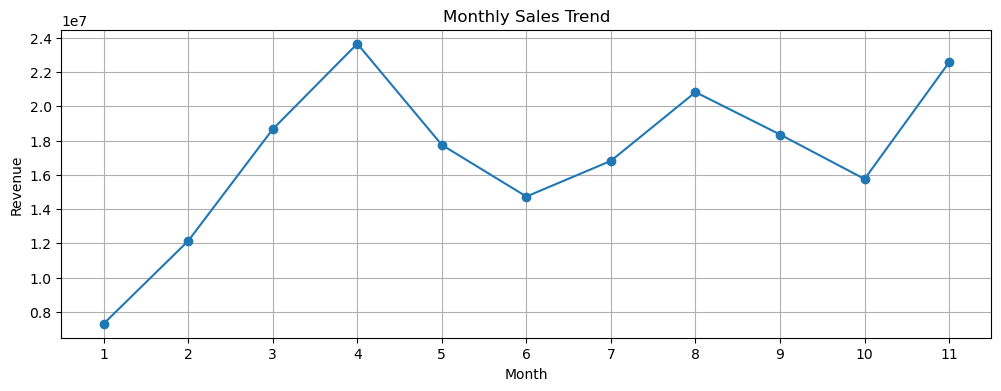

In [53]:
import matplotlib.pyplot as plt

# Plot the line graph
temp_df = sales_df[sales_df['year'] == post_year]
x = temp_df.groupby('month')['정산기준금액'].sum()[:post].keys()
y = temp_df.groupby('month')['정산기준금액'].sum()[:post].values

plt.figure(figsize=(12, 4))
plt.plot(x, y, marker='o')  # 'Date' for x-axis and 'Value' for y-axis
plt.title('Monthly Sales Trend')         # Add title
plt.xlabel('Month')                             # Label for x-axis
plt.ylabel('Revenue')                            # Label for y-axis
plt.grid(True)                                 # Add grid for better visualization
plt.xticks(x)
plt.show()

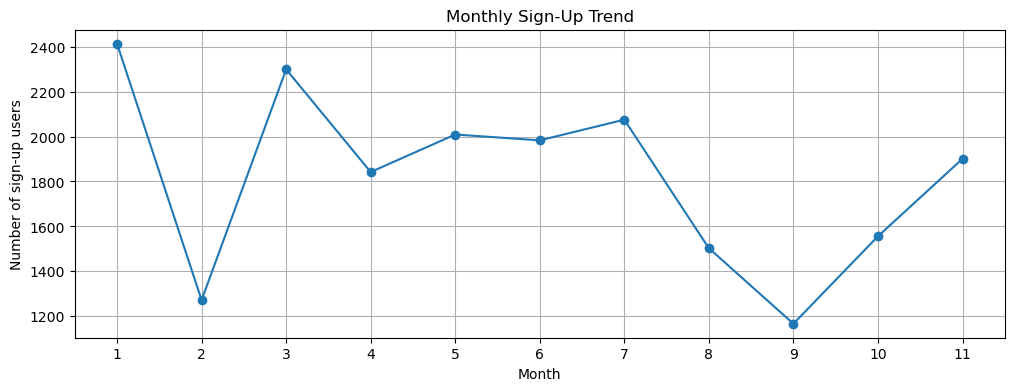

In [51]:
temp_df = df[df['sign_up_year'] == post_year]
x = temp_df.groupby('sign_up_month')['userId'].count().keys()[:post]
y = temp_df.groupby('sign_up_month')['userId'].count().values[:post]

plt.figure(figsize=(12, 4))
plt.plot(x, y, marker='o')  # 'Date' for x-axis and 'Value' for y-axis
plt.title('Monthly Sign-Up Trend')         # Add title
plt.xlabel('Month')                             # Label for x-axis
plt.ylabel('Number of sign-up users')                            # Label for y-axis
plt.grid(True)                                 # Add grid for better visualization
plt.xticks(x)
plt.show()

In [55]:
sales_df

,주문번호,상품명,주문일,정산기준금액,year,month,date,day
0,2700037196,[스페셜할인코드/친한] 트루엔 비타민D3 2000IU 츄어블 1박스(90정),2024-12-03 17:11:47.000,23750,2024,12,3,2024-12-03
1,2699813016,[스페셜할인코드/친한] 더리틀스 람노플유산균 1박스(4개월분),2024-12-03 13:25:14.000,102600,2024,12,3,2024-12-03
2,2699395257,[스페셜할인코드/친한] 더리틀스 징코 피크노제놀 부스터 1박스(1개월분),2024-12-03 02:28:14.000,106200,2024,12,3,2024-12-03
3,2699395256,[스페셜할인코드/친한] 더리틀스 코큐텐부스터 1박스(1개월분),2024-12-03 02:28:14.000,15200,2024,12,3,2024-12-03
4,2699395255,[스페셜할인코드/친한] 더리틀스 실리부스터 1박스(1개월분),2024-12-03 02:28:14.000,24220,2024,12,3,2024-12-03
...,...,...,...,...,...,...,...,...
82,50089-50127,[스페셜할인코드/친한] YDY 풀스펙멀티비타민 1박스(1개월분),2024-10-21 20:19:09.565,42740,2024,10,21,2024-10-21
83,50049-50070,[스페셜할인코드/친한] YDY 썬비타민D3 2500IU 1박스(60일분),2024-10-09 19:59:36.586,21370,2024,10,9,2024-10-09
84,50049-50071,[스페셜할인코드/안재돈약사] YDY 코랄칼마디 1박스(1개월분) / 칼슘 마그네슘 ...,2024-10-09 19:59:36.586,23750,2024,10,9,2024-10-09
85,50077-50111,[스페셜할인코드/고상온약사] YDY 코랄칼마디 1박스(1개월분) / 칼슘 마그네슘 ...,2024-10-19 16:01:26.066,71250,2024,10,19,2024-10-19


# User
Visualize sales trends over time using a line plot with `matplotlib` or `seaborn`.

# Assistant
To visualize sales trends over time using a line plot, you can follow these steps. The code below assumes that you want to aggregate the sales data by date and then plot the total sales amount over time.

Here's how you can do it using `matplotlib`:


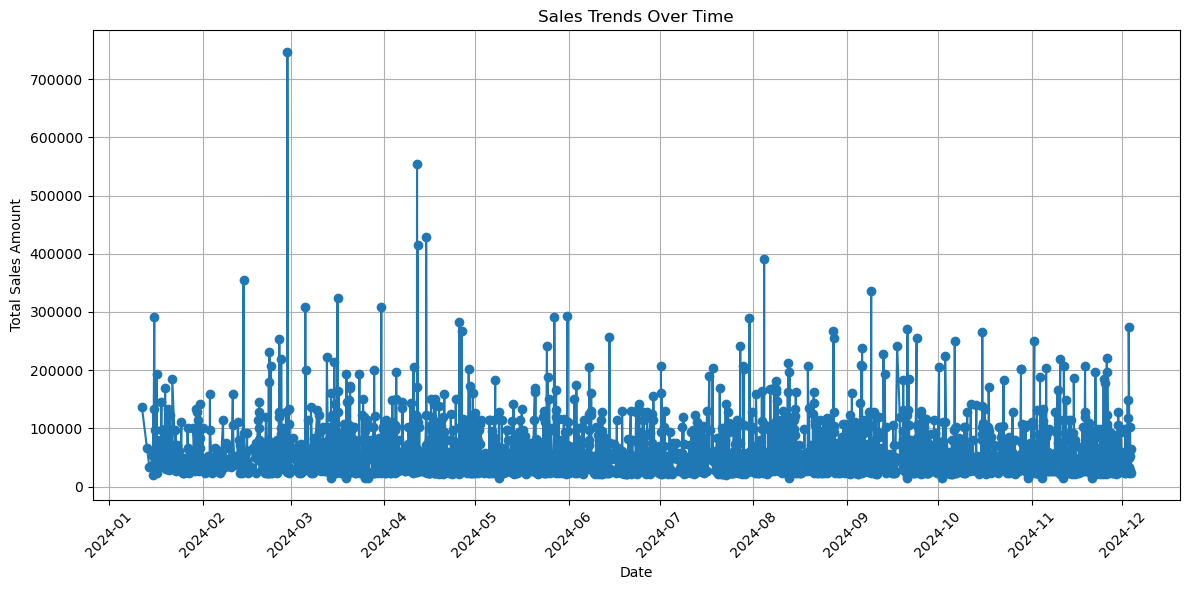

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

sales_df['주문일'] = pd.to_datetime(sales_df['주문일'])

# Group by '주문일' and sum the '정산기준금액' to get total sales per day
daily_sales = sales_df.groupby('주문일')['정산기준금액'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['주문일'], daily_sales['정산기준금액'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trends Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


This code will create a line plot showing the total sales amount for each day, allowing you to visualize trends over time. Adjust the figure size and other parameters as needed for better visibility.